# Изучение данных из файла

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.<br>
<br>

**Основная задача:** предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


## Тарифы
<br>
<b>Тариф «Смарт»</b> <br>
<br>
1.Ежемесячная плата: 550 рублей <br>
<br>
2.В тариф включено: <br>
<ul>
<li>500 минут разговора </li>
<li>50 сообщений </li>
<li>15 Гб интернет-трафика </li>
</ul>
<br>
3.Стоимость услуг сверх тарифного пакета:
<ul>
<li>минута разговора: 3 рубля </li>
<li>сообщение: 3 рубля </li>
<li>1 Гб интернет-трафика: 200 рублей </li>
</ul>
<br>
<p><b>Тариф «Ультра»</b></p>
<br>
1.Ежемесячная плата: 1950 рублей <br>
<br>
2.В тариф включено: <br>
<ul>
<li>3000 минут разговора </li>
<li>1000 сообщений </li>
<li>30 Гб интернет-трафика </li>
</ul>
<br>
3.Стоимость услуг сверх тарифного пакета: <br>
<ul>
<li>минута разговора: 1 рубль </li>
<li>сообщение: 1 рубль </li>
<li>1 Гб интернет-трафика: 150 рублей</li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# Загрузим данные:
df_calls = pd.read_csv('calls.csv')
df_internet = pd.read_csv('internet.csv')
df_messages = pd.read_csv('messages.csv')
df_tariffs = pd.read_csv('tariffs.csv')
df_users = pd.read_csv('users.csv')

**Таблица users** (информация о пользователях): <br>
<br>
**user_id** — уникальный идентификатор пользователя <br>
**first_name** — имя пользователя <br>
**last_name** — фамилия пользователя <br>
**age** — возраст пользователя (годы) <br>
**reg_date** — дата подключения тарифа (день, месяц, год) <br>
**churn_date** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных) <br>
**city** — город проживания пользователя <br>
**tariff** — название тарифного плана <br>
<br>
<br>
**Таблица calls** (информация о звонках): <br>
<br>
**id** — уникальный номер звонка <br>
**call_date** — дата звонка <br>
**duration** — длительность звонка в минутах <br>
**user_id** — идентификатор пользователя, сделавшего звонок <br>
<br>
<br>
**Таблица messages** (информация о сообщениях):<br>
<br>
**id** — уникальный номер сообщения <br>
**message_date** — дата сообщения <br>
**user_id** — идентификатор пользователя, отправившего сообщение <br>
<br>
<br>
**Таблица internet** (информация об интернет-сессиях):<br>
<br>
**id** — уникальный номер сессии <br>
**mb_used** — объём потраченного за сессию интернет-трафика (в мегабайтах) <br>
**session_date** — дата интернет-сессии <br>
**user_id** — идентификатор пользователя <br>
<br>
<br>
**Таблица tariffs** (информация о тарифах):<br>
<br>
**tariff_name** — название тарифа <br>
**rub_monthly_fee** — ежемесячная абонентская плата в рублях <br>
**minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату <br>
**messages_included** — количество сообщений в месяц, включённых в абонентскую плату <br>
**mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах) <br>
**rub_per_minute** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата) <br>
**rub_per_message** — стоимость отправки сообщения сверх тарифного пакета <br>
**rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта) <br>


**Проведем проверку наличия пропусков в данных:**

In [3]:
#Создадим словарь соответствия фрейма и его имени
dict_frames ={
    'df_calls': df_calls,
    'df_internet': df_internet,
    'df_messages': df_messages,
    'df_tariffs': df_tariffs,
    'df_users': df_users 
}

In [4]:
 def info_frame(dict_of_frames):
    def table(dataframe, name):
        # собираем данные из конкретной таблицы
        columns = dataframe.columns
        count_of_rows = len(columns)
        total = dataframe.shape[0]
        
        part_total_table = pd.DataFrame(data =[[0] * 5] * count_of_rows, 
                                        columns = ['total',
                                                   'frame',
                                                   "columns",
                                                   "null_values",
                                                   "type"])
    
        part_total_table['total'] = [total] * count_of_rows
        part_total_table['frame'] = [name] * count_of_rows
        part_total_table['columns'] = columns
        
        
        for column in columns:
            curent_type = str(dataframe[column].dtype)
            count_of_null = dataframe[column].isnull().sum() * 100 / part_total_table['total'] 
            part_total_table.loc[part_total_table['columns'] == column,'null_values'] = count_of_null 
            part_total_table.loc[part_total_table['columns'] == column,'type'] = curent_type
        
        return part_total_table
    
    # объединяем даные из каждой таблицы в одну   
    final_frame = pd.DataFrame(columns = ['total','frame',"columns","null_values","type"])
    
    for name,frame in dict_of_frames.items():
        part_of_table = table(frame,name)
        final_frame = final_frame.append(part_of_table)
        
    final_frame = final_frame.reset_index(drop = True)
    final_frame_grouped = final_frame.groupby(['total','frame',"columns"]).first()
    final_frame_grouped = final_frame_grouped.style.background_gradient(cmap='Blues',subset=['null_values'])
    
    return final_frame_grouped

In [5]:
info_frame(dict_frames)

**Вывод:** В DF **df_users** есть доля пропусков в столбце **churn_date**, котоая составляет 462 или 92.4%. Это те данные клиентов, чьи тарифы клиентов являются действующими. Оставим как есть.

# Подготовка данных

## Перевод данных к нужному типу

Составим функцию для перевода в формат времени и переведем необходимые данные:

In [6]:
# Создадим словарь столбцов и таблиц, необходимых для изменения типа данных
columns_to_datetime = {"reg_date":df_users,
                       "message_date":df_messages,
                       "session_date":df_internet,
                       "call_date":df_calls}
for column, frame in columns_to_datetime.items():
    frame[column] = pd.to_datetime(frame[column],format = '%Y-%m-%d')

Создадим столбцы с номером месяца каждого события события у клиента: 

In [7]:
columns_to_month = {"call_date":df_calls,
                       "message_date":df_messages,
                       "session_date":df_internet}
for column, frame in columns_to_month.items():
    frame['month'] = frame[column].dt.month
    frame['name_month'] = frame[column].dt.month_name()

## Словарь месяцев
Создадим словарь с обозначением номера месяца и его названия:

In [8]:
lib_month = df_messages[['month','name_month']].drop_duplicates().sort_values('month').reset_index(drop=True)
lib_month.columns = ['Обозначение', 'Месяц']
lib_month

,Обозначение,Месяц
0,1,January
1,2,February
2,3,March
3,4,April
4,5,May
5,6,June
6,7,July
7,8,August
8,9,September
9,10,October


## Сбор необходимых данных

Создадим таблицу со всеми необходимыми данными для анализа:

In [9]:
# Округлим в большую сторону длительность звонков и потраченных мегабайтов (по условию тарифных планов)
df_calls['duration'] = np.ceil(df_calls['duration'])
df_internet['mb_used'] = np.ceil(df_internet['mb_used'])

In [10]:
# Создадим таблицу с необходимыми колонками
statistic_frame = pd.DataFrame(columns= ['user_id',
                                    "month",
                                    "count_calls",
                                    'calls_total_duration',
                                    'count_messages',
                                    'total_mb_used'
                                   ])
# для каждого пользователя и каждого месяца сформируем данные
for idx in df_users['user_id']:
    for month_x in range(1,13):
        if ((month_x in df_calls.query('user_id == @idx')['month'].to_numpy()) or
            (month_x in df_messages.query('user_id == @idx')['month'].to_numpy())):
            
            count_calls = df_calls.query('user_id == @idx and month == @month_x').shape[0]
            total_duration_calls = df_calls.query('user_id == @idx and month == @month_x')['duration'].sum()
            #total_duration_calls = df_calls.groupby(['month','user_id'])['duration'].sum()
            count_messages = df_messages.query('user_id == @idx and month == @month_x').shape[0]
            total_used = df_internet.query('user_id == @idx and month == @month_x')['mb_used'].sum()
            #total_used = df_internet.groupby(['month','user_id'])['mb_used'].sum()
            statistic_frame = statistic_frame.append({'user_id':idx,
                               'month':month_x,             
                               "count_calls":count_calls,
                               'calls_total_duration':total_duration_calls,
                               'count_messages':count_messages,
                               'total_mb_used':total_used             
                                           }, ignore_index=True)
df_users.shape;

In [11]:
# переведем некоторые данные в формат int для удобства 
statistic_frame[['user_id','month','count_calls','count_messages','total_mb_used','calls_total_duration']] \
= statistic_frame[['user_id', 'month','count_calls','count_messages', 'total_mb_used','calls_total_duration']].astype('int')
# объединим полученную таблицу с другими данными: city, tariff
statistic_frame = statistic_frame.merge(df_users[['user_id','tariff']], on = 'user_id')
statistic_frame = statistic_frame.merge(df_users[['user_id','city']], on = 'user_id')
statistic_frame

,user_id,month,count_calls,calls_total_duration,count_messages,total_mb_used,tariff,city
0,1000,5,22,159,22,2256,ultra,Краснодар
1,1000,6,43,172,60,23257,ultra,Краснодар
2,1000,7,47,340,75,14016,ultra,Краснодар
3,1000,8,52,408,81,14070,ultra,Краснодар
4,1000,9,58,466,57,14581,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3208,1498,10,41,247,42,20604,smart,Владикавказ
3209,1499,9,9,70,11,1848,smart,Пермь
3210,1499,10,68,449,48,17809,smart,Пермь
3211,1499,11,74,612,59,17984,smart,Пермь


**Вывод:** мы получили: <br>
<ul>
    <li>количество сделанных звонков и израсходованных минут разговора по месяцам</li>
    <li>количество отправленных сообщений по месяцам</li>
    <li>объем израсходованного интернет-трафика по месяцам</li>
</ul>

**Определим помесячную выручку с каждого пользователя:**

In [12]:
def fun_income(row):
    #Функция, которая определяет расходы звонок, сообщений и трафика свыше нормы
    def get_extra(dict_of_param):
        local_extra_min = 0
        local_extra_sms = 0
        local_extra_gb = 0
        if row['calls_total_duration'] > dict_of_param['calls_total_duration']: 
            local_extra_min = row['calls_total_duration'] - dict_of_param['calls_total_duration']
        if row['count_messages'] > dict_of_param['count_messages']:
            local_extra_sms = row['count_messages'] - dict_of_param['count_messages']
        if row['total_mb_used'] > dict_of_param['total_mb_used']:
            local_extra_gb = (row['total_mb_used'] - dict_of_param['total_mb_used'])/1024
            local_extra_gb = np.ceil(local_extra_gb)
        return local_extra_min, local_extra_sms, local_extra_gb
    # Создадим переменные условий каждого тарифа
    ultra_param = {
        'calls_total_duration': df_tariffs['minutes_included'][1],
        'count_messages': df_tariffs['messages_included'][1],
        'total_mb_used': df_tariffs['mb_per_month_included'][1]
    }
    smart_param = {
        'calls_total_duration': df_tariffs['minutes_included'][0],
        'count_messages': df_tariffs['messages_included'][0],
        'total_mb_used': df_tariffs['mb_per_month_included'][0]
    }
    if row['tariff'] == 'ultra':
        income = 1950
        extra_min, extra_sms, extra_gb = get_extra(ultra_param)
        income += extra_min + extra_sms + extra_gb * 150     
    elif row['tariff'] == 'smart':
        income = 550
        extra_min, extra_sms, extra_gb = get_extra(smart_param)
        income += 3 * extra_min + 3* extra_sms + extra_gb * 200
    return income

In [13]:
statistic_frame['income'] = statistic_frame.apply(fun_income, axis = 1)
statistic_frame['income'] = statistic_frame['income'].astype(int)
statistic_frame

,user_id,month,count_calls,calls_total_duration,count_messages,total_mb_used,tariff,city,income
0,1000,5,22,159,22,2256,ultra,Краснодар,1950
1,1000,6,43,172,60,23257,ultra,Краснодар,1950
2,1000,7,47,340,75,14016,ultra,Краснодар,1950
3,1000,8,52,408,81,14070,ultra,Краснодар,1950
4,1000,9,58,466,57,14581,ultra,Краснодар,1950
...,...,...,...,...,...,...,...,...,...
3208,1498,10,41,247,42,20604,smart,Владикавказ,1750
3209,1499,9,9,70,11,1848,smart,Пермь,550
3210,1499,10,68,449,48,17809,smart,Пермь,1150
3211,1499,11,74,612,59,17984,smart,Пермь,1513


**Вывод:** Полученная таблица содержит все необходимые данные по каждому клиенту в каждый месяц использования определнного  тарифа. Также посчитана выгода от каждого клиента.

# Анализ данных

Посчитаем среднее количество (арифмитическое и медианное), дисперсию, стандартное отклонение минут разговора, сообщений, и интернет трафика пользователям каждого тарифа.

In [14]:
stat_frame = statistic_frame.pivot_table(index='tariff', values = ['calls_total_duration',
                                                                   'count_messages',
                                                                   'total_mb_used','income'], aggfunc = ['median',
                                                                                                         'mean', 'var','std'])
stat_frame

median                                      \
       calls_total_duration count_messages income total_mb_used   
tariff                                                            
smart                 422.0             28   1038       16531.0   
ultra                 518.5             38   1950       19329.5   

                       mean                                            \
       calls_total_duration count_messages       income total_mb_used   
tariff                                                                  
smart            417.934948      33.384029  1294.639300  16229.188425   
ultra            527.158537      49.413618  2071.189024  19506.165650   

                        var                                              \
       calls_total_duration count_messages         income total_mb_used   
tariff                                                                    
smart          36219.315784     796.812958  673931.321363  3.454591e+07   
ultra         100693.836489    2285.109519  143622.287733  1.016734e+08   

                        std                                           
       calls_total_duration count_messages      income total_mb_used  
tariff                                                                
smart            190.313730      28.227876  820.933202   5877.576978  
ultra            317.322921      47.802819  378.975313  10083.323245

Построим гистограммыминут разговора, сообщений, и интернет трафика пользователям каждого тарифа

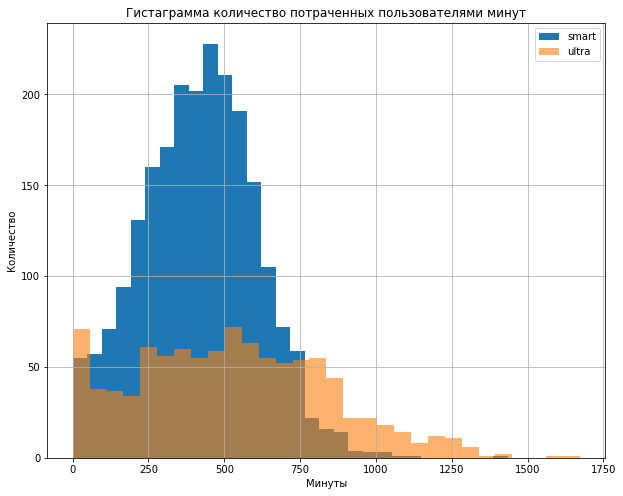

In [15]:
statistic_frame.loc[statistic_frame.loc[:,'tariff'] == 'smart']['calls_total_duration'].plot(
                                                                            kind = 'hist',
                                                                            bins = 30,
                                                                            label = 'smart', figsize = (10,8)
                                                                           )
statistic_frame.loc[statistic_frame.loc[:,'tariff'] == "ultra"]['calls_total_duration'].plot(
                                                                            kind = 'hist',
                                                                            bins = 30,
                                                                            alpha =0.6,
                                                                            label = 'ultra',figsize = (10,8),
                                                                            grid = True,
                                                                           )
plt.title('Гистаграмма количество потраченных пользователями минут')
plt.xlabel('Минуты')
plt.ylabel('Количество')
plt.legend();

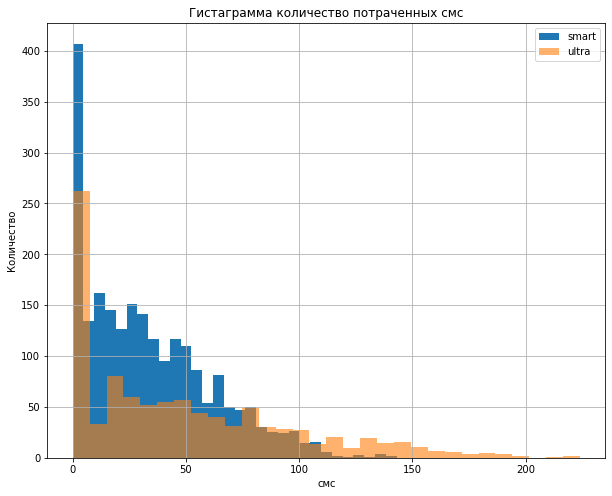

In [16]:
statistic_frame.loc[statistic_frame.loc[:,'tariff'] == 'smart']['count_messages'].plot(
                                                                            kind = 'hist',
                                                                            bins = 30,
                                                                            label = 'smart', figsize = (10,8)
                                                                           )
statistic_frame.loc[statistic_frame.loc[:,'tariff'] == "ultra"]['count_messages'].plot(
                                                                            kind = 'hist',
                                                                            bins = 30,
                                                                            alpha =0.6,
                                                                            label = 'ultra',figsize = (10,8),
                                                                            grid = True,
                                                                           )
plt.title('Гистаграмма количество потраченных смс')
plt.xlabel('смс')
plt.ylabel('Количество')
plt.legend();

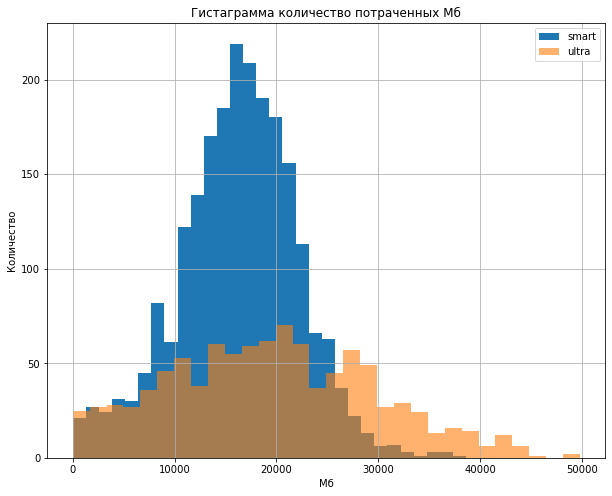

In [17]:
statistic_frame.loc[statistic_frame.loc[:,'tariff'] == 'smart']['total_mb_used'].plot(
                                                                            kind = 'hist',
                                                                            bins = 30,
                                                                            label = 'smart', figsize = (10,8)
                                                                           )
statistic_frame.loc[statistic_frame.loc[:,'tariff'] == "ultra"]['total_mb_used'].plot(
                                                                            kind = 'hist',
                                                                            bins = 30,
                                                                            alpha =0.6,
                                                                            label = 'ultra',figsize = (10,8),
                                                                            grid = True,
                                                                           )
plt.title('Гистаграмма количество потраченных Мб')
plt.xlabel('Мб')
plt.ylabel('Количество')
plt.legend();

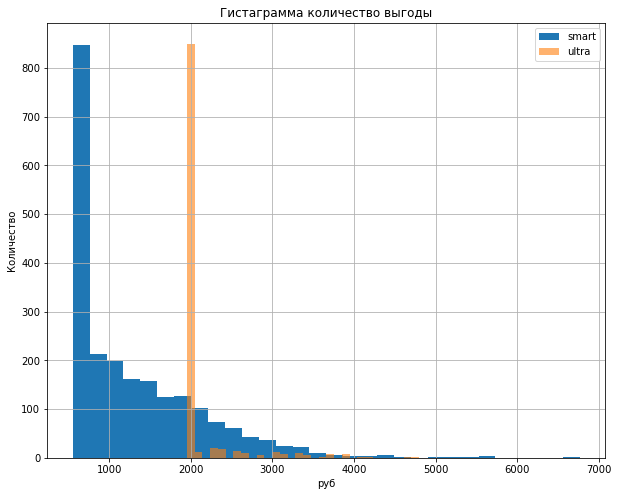

In [18]:
statistic_frame.loc[statistic_frame.loc[:,'tariff'] == 'smart']['income'].plot(
                                                                            kind = 'hist',
                                                                            bins = 30,
                                                                            label = 'smart', figsize = (10,8)
                                                                           )
statistic_frame.loc[statistic_frame.loc[:,'tariff'] == "ultra"]['income'].plot(
                                                                            kind = 'hist',
                                                                            bins = 30,
                                                                            alpha =0.6,
                                                                            label = 'ultra',figsize = (10,8),
                                                                            grid = True,
                                                                           )
plt.title('Гистаграмма количество выгоды')
plt.xlabel('руб')
plt.ylabel('Количество')
plt.legend();

**Вывод:** В 4 раза больше пользователей с тарифом Smart тратят минуты и трафика, и в 2 раза больше смс. Малое количество пользователей с тарифом Ultra переплачивают, соответсвтенно большинству людей достаточно базового пакета. Так как медианное значение некоторых параметров тарифа Ultra находятся левее среднего, то можно сказать, что данные скошены вправо. У тарифа  Smart наоборот.

# Проверка гипотез 

## Первая гипотеза

**Нулевая гипотеза:** средняя выручка пользователей тарифов «Ультра» и «Смарт» равны <br>
**Альтернативная гипотеза:** средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [19]:
alpha = 0.05
income_ultra = statistic_frame[statistic_frame['tariff'] == 'ultra']['income']
income_smart = statistic_frame[statistic_frame['tariff'] == 'smart']['income']
result = st.ttest_ind(income_smart,income_ultra, equal_var = False) 
prob = result.pvalue
print('p-значение:', prob)
#print(np.var(income_ultra))
#print(np.var(income_smart))
if prob < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось нулевую гипотезу")

p-значение: 3.2772041270985486e-246
Отвергаем нулевую гипотезу


**Вывод:** Отвергнув нулевую гипотезу, мы подтверждаем первую гипотезу - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

## Вторая гипотеза

**Нулевая гипотеза:** средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов<br>
**Альтернативная гипотеза:** средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [20]:
city_moscow = statistic_frame.loc[statistic_frame.loc[:,'city'] == 'Москва']['income']
city_other = statistic_frame.loc[statistic_frame.loc[:,'city'] != 'Москва']['income']
result_city = st.ttest_ind(city_moscow,city_other,equal_var=False) 
prob_city = result_city.pvalue
print("p-значение:{}".format(prob_city))
#print(np.var(city_moscow))
#print(np.var(city_other))
if prob_city < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:0.5254578510057593
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Не получилось отвергнуть нулевую гипотезу, соответственно средняя выручка пользователей из Москвы не отличается от пользователей другиз регионов.

# Вывод

Рекламный бюджет выгоднее всего перераспределить в пользу тарифа ultra, несмотря на то, что его абоненты не покупают дополнительные минуты и смс, в отличие от абонентов тарифа smart. Так же можно заметить, что медианное и среднее значение дохода у абонентов тарифа ultra выше. 

Так же исследовав предоставленные данные мы смогли проверить гипотезы. Эти данные помогли нам опровергнуть гипотезу о том, что средняя выручка пользователей разных тарифов равна, а так же с большой вероятностью сказать, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

Кроме того, в процессе анализа мы узнали, что в среднем разница медианных и среднеарифметических значений дохода с разных тарифов отличается.